In [2]:
!pip install zipline-tej

In [3]:
!pip install pyfolio

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# tej_key
# 2KyFijgT83U1TsAD2bB3uk4dxJJwyp
# G3bD8xWb79qNk4gE5FHBD3NDvvsIsV
tej_key = 'G3bD8xWb79qNk4gE5FHBD3NDvvsIsV'
api_base = 'https://api.tej.com.tw'

os.environ['TEJAPI_KEY'] = tej_key
os.environ['TEJAPI_BASE'] = api_base

start = '2023-01-01'
end = '2023-12-31'


In [5]:
os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = '2330 IR0001'
!zipline ingest -b tquant

[2025-06-08 07:54:03.859160] INFO: zipline.data.bundles.core: Ingesting tquant.
Merging daily equity files:  [####################################]   
Currently used TEJ API key call quota 38/1000 (3.8%)
Currently used TEJ API key data quota 15424/10000000 (0.15%)
[2025-06-08 07:54:09.097421] INFO: zipline.data.bundles.core: Ingest tquant successfully.


In [6]:
from zipline.api import *
from zipline.finance import commission, slippage
def initialize(context):
  context.day = 0
  context.tickers = []
  set_slippage(slippage.VolumeShareSlippage(volume_limit = 0.025, price_impact = 0.1))
  set_commission(commission.Custom_TW_Commission(min_trade_cost = 20, discount = 1.0, tax = 0.003))
  set_benchmark(symbol('IR0001'))

In [7]:
def handle_data(context, data):
  buyday = 15
  if context.day == buyday:
    order_target_percent(symbol(2330), 1.0)
  if context.day == buyday+180:
    order_target_percent(symbol(2330), 0)
  context.day += 1

In [8]:
import matplotlib.pyplot as plt

capital_base = 1e7  # 設定初始資金

def analyze(context, results):

  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  results['benchmark_cum'] = results.benchmark_return.add(1).cumprod() * capital_base
  results[['portfolio_value', 'benchmark_cum']].plot(ax = ax1, label = 'Portfolio Value($)')
  ax1.set_ylabel('Portfolio value (TWD)')

  plt.legend(loc = 'upper left')

  plt.gcf().set_size_inches(18, 8)
  plt.grid()
  plt.show()

In [ ]:
from zipline import run_algorithm
from zipline.utils.run_algo import get_transaction_detail
start_date = pd.Timestamp('2023-01-01', tz = 'utc')
end_date = pd.Timestamp('2023-12-31', tz = 'utc')

results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    handle_data = handle_data,
    analyze = analyze,
    bundle = 'tquant',
    capital_base = capital_base,
)

results

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

--- Logging error ---
--- Logging error ---
--- Logging error ---
--- Logging error ---
--- Logging error ---
Error in sys.excepthook:
Traceback (most recent call last):
  File "/usr/lib/python3.11/traceback.py", line 350, in _walk_tb_with_full_positions
    positions = _get_code_position(tb.tb_frame.f_code, tb.tb_lasti)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/traceback.py", line 364, in _get_code_position
    return next(itertools.islice(positions_gen, instruction_index // 2, None))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
StopIteration

The above exception was the direct cause of

<Axes: >

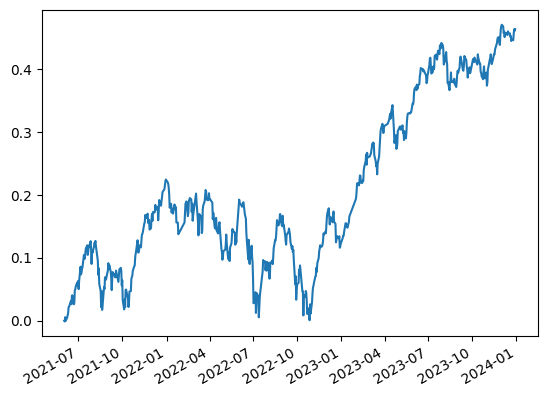

In [ ]:
results.returns.cumsum().plot()

In [ ]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline
import pyfolio

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)  # 從 results 資料表中取出 returns, positions & transactions
benchmark_rets = results.benchmark_return  # 取出 benchmark 的報酬率

<Axes: title={'center': 'Rolling Sharpe ratio (6-month)'}, ylabel='Sharpe ratio'>

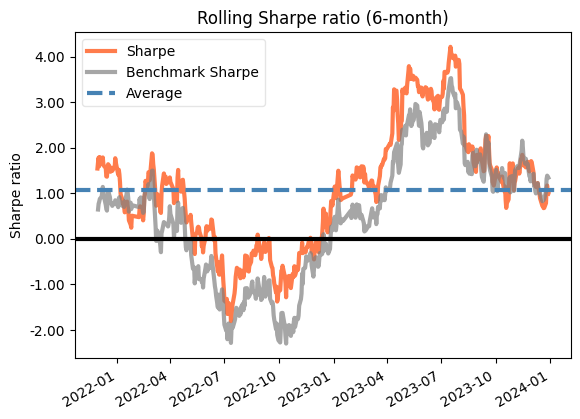

In [ ]:
# 繪製夏普比率圖

from pyfolio.plotting import plot_rolling_sharpe

plot_rolling_sharpe(returns,
          factor_returns=benchmark_rets)

Start date,2021-06-01
End date,2023-12-29
Total months,30
,Backtest
Annual return,18.144%
Cumulative returns,52.118%
Annual volatility,18.792%
Sharpe ratio,0.98
Calmar ratio,0.83
Stability,0.62
Max drawdown,-21.792%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.79,2021-12-30,2022-10-26,2023-02-20,274
1,10.76,2021-07-26,2021-10-04,2021-11-10,75
2,7.34,2023-07-28,2023-08-14,2023-11-22,80
3,6.79,2023-04-17,2023-04-25,2023-05-29,30
4,4.97,2023-03-08,2023-03-16,2023-03-22,11


Top 10 long positions of all time,max
sid,
8478,9.19%
2482,5.35%
5258,5.30%
3035,4.22%
4755,3.26%
1560,2.59%
1342,2.59%
6515,2.57%
2329,2.54%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
8478,9.19%
2482,5.35%
5258,5.30%
3035,4.22%
4755,3.26%
1560,2.59%
1342,2.59%
6515,2.57%
2329,2.54%


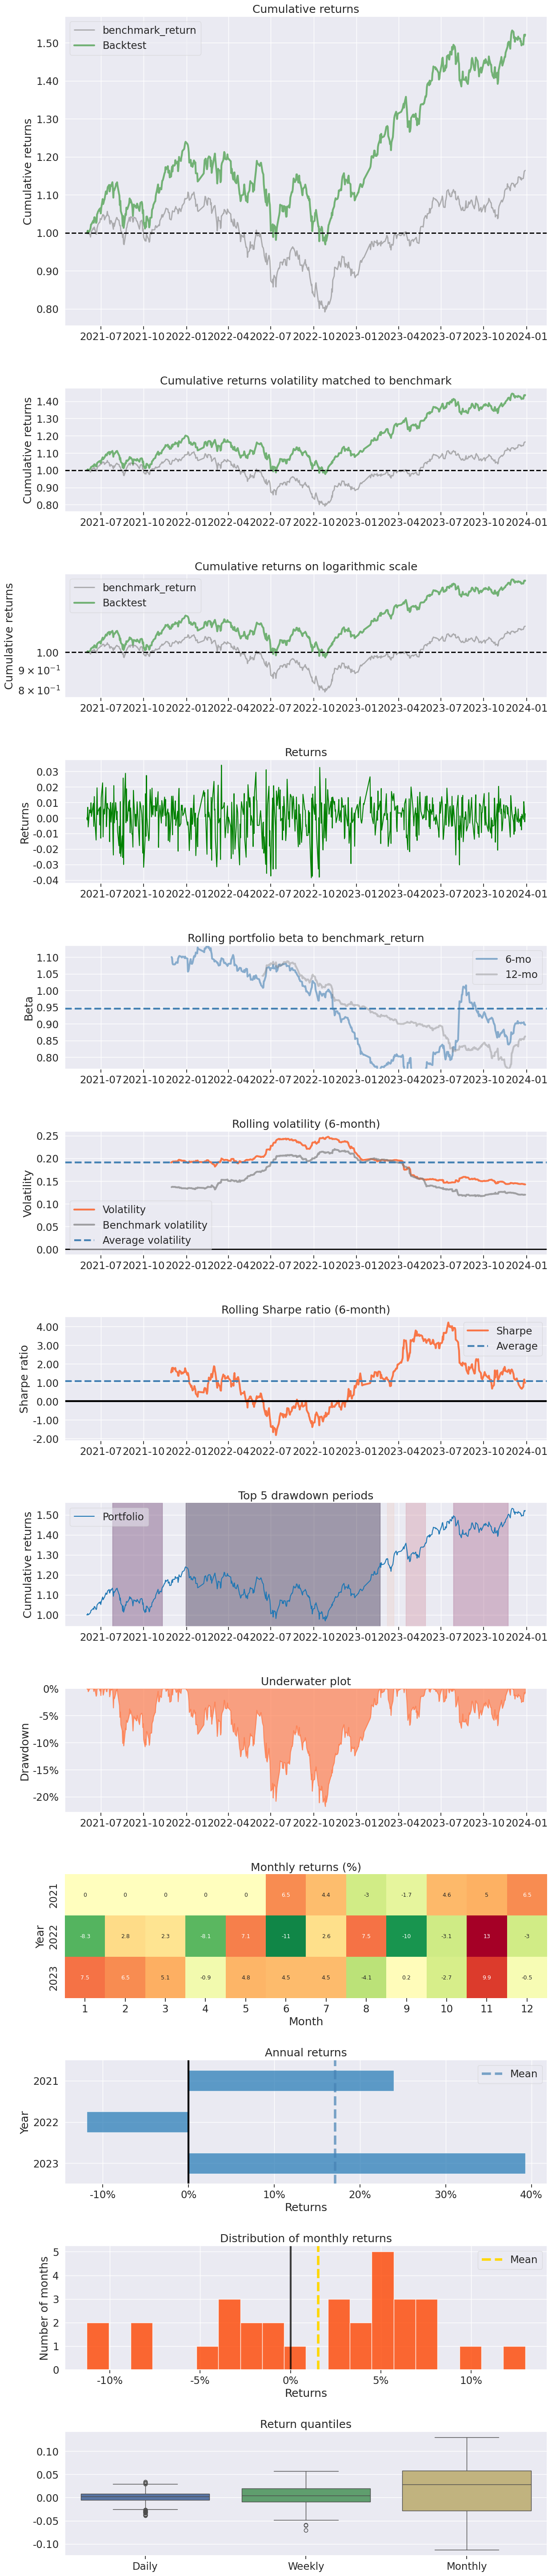

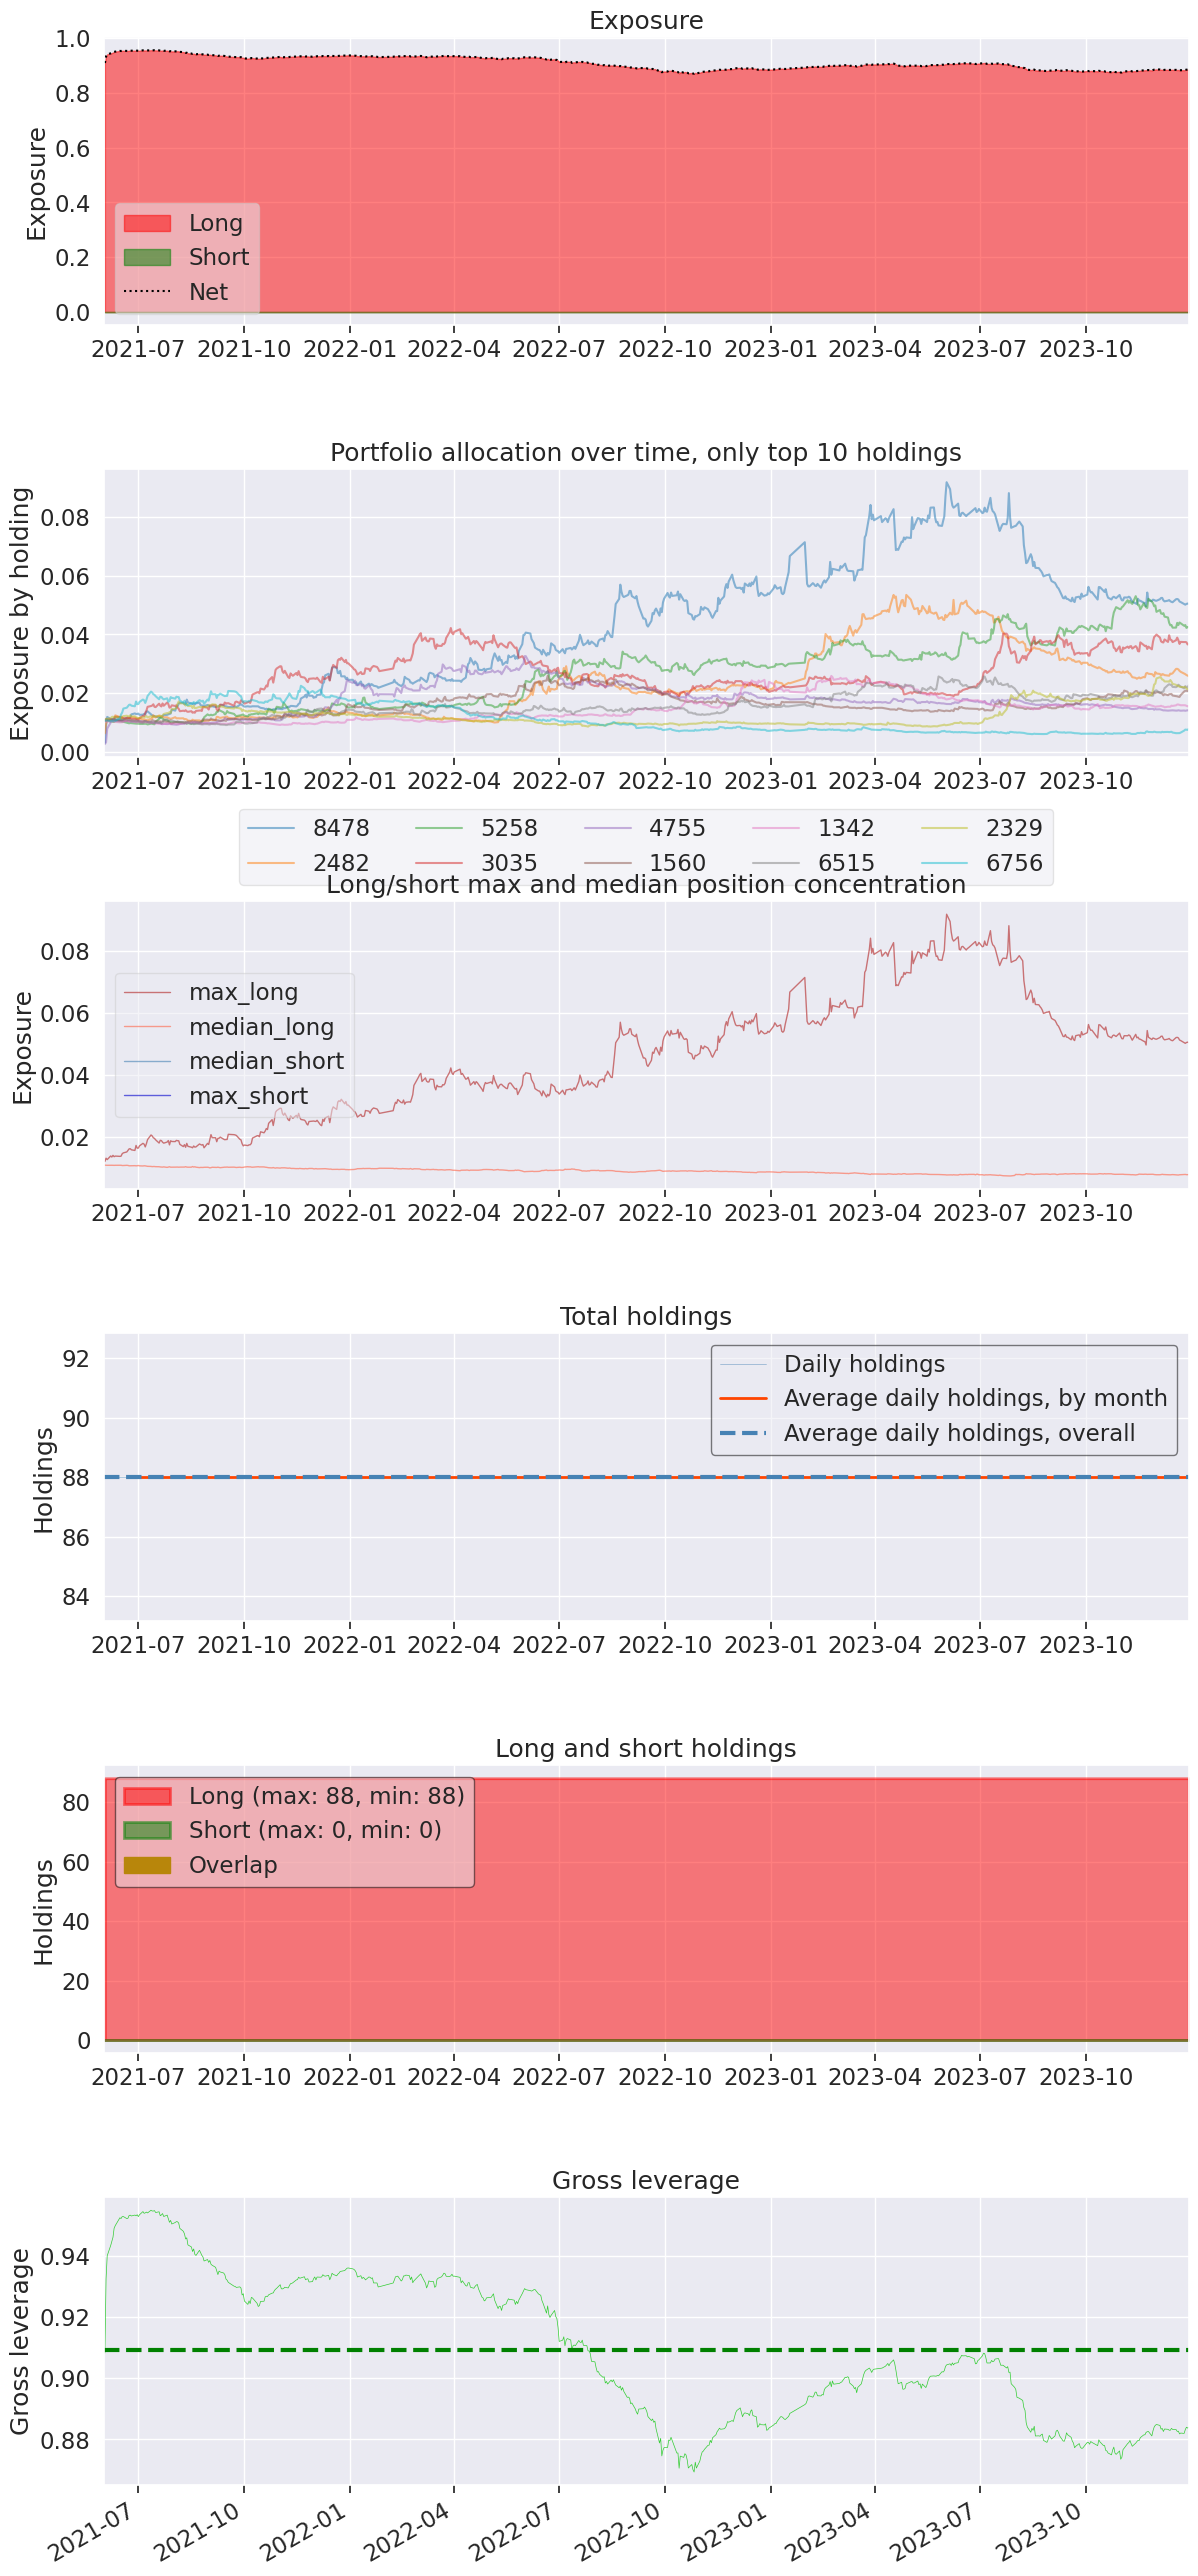

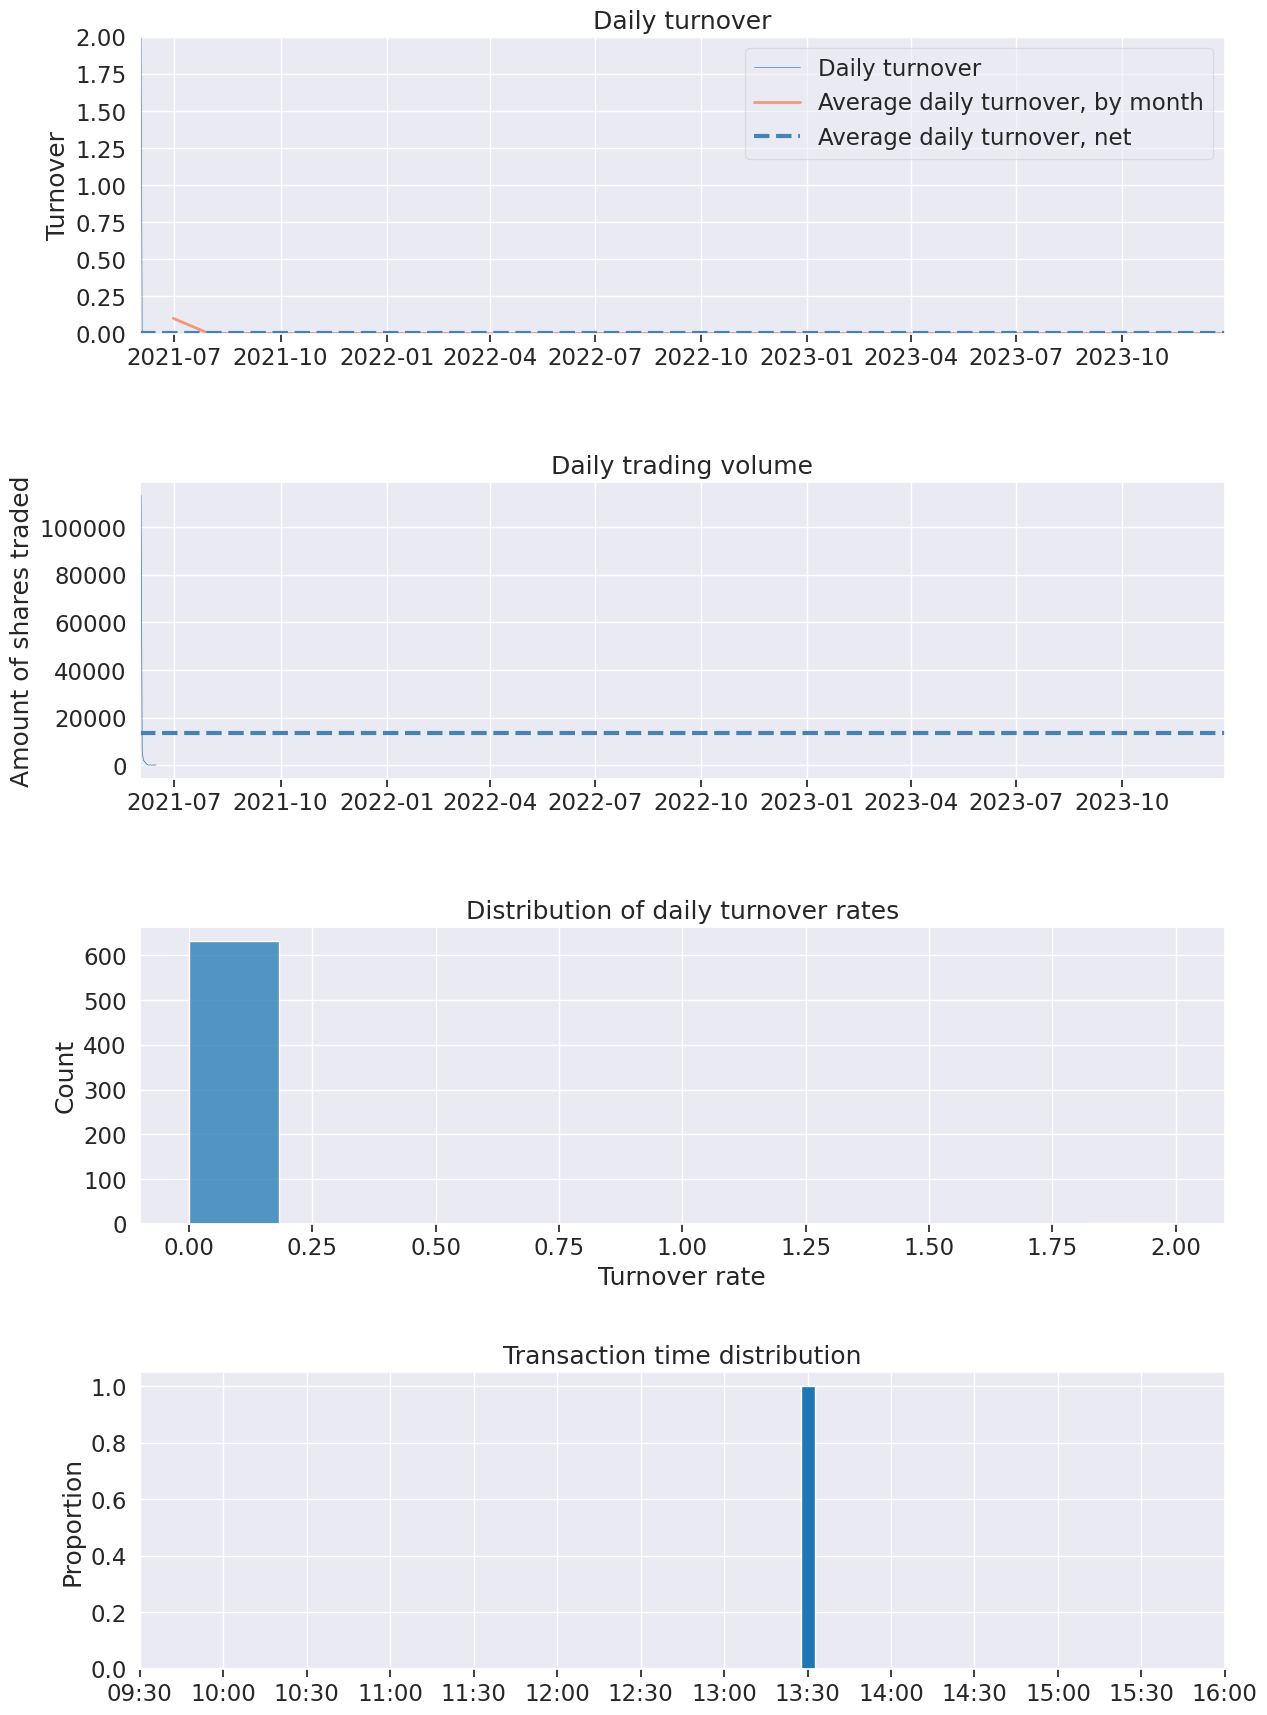

In [ ]:
pyfolio.tears.create_full_tear_sheet(returns=returns,
                  positions=positions,
                  transactions=transactions,
                  benchmark_rets=benchmark_rets
                  )